# Predict Pokemon battles using Machine Learning

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Datasets

In [2]:
pokemon_df = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")
tests_df = pd.read_csv("tests.csv")

# __`pokemon_df`__

In [3]:
pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


#### Print shape of pokemon_df

In [4]:
pokemon_df.shape

(800, 12)

In [5]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


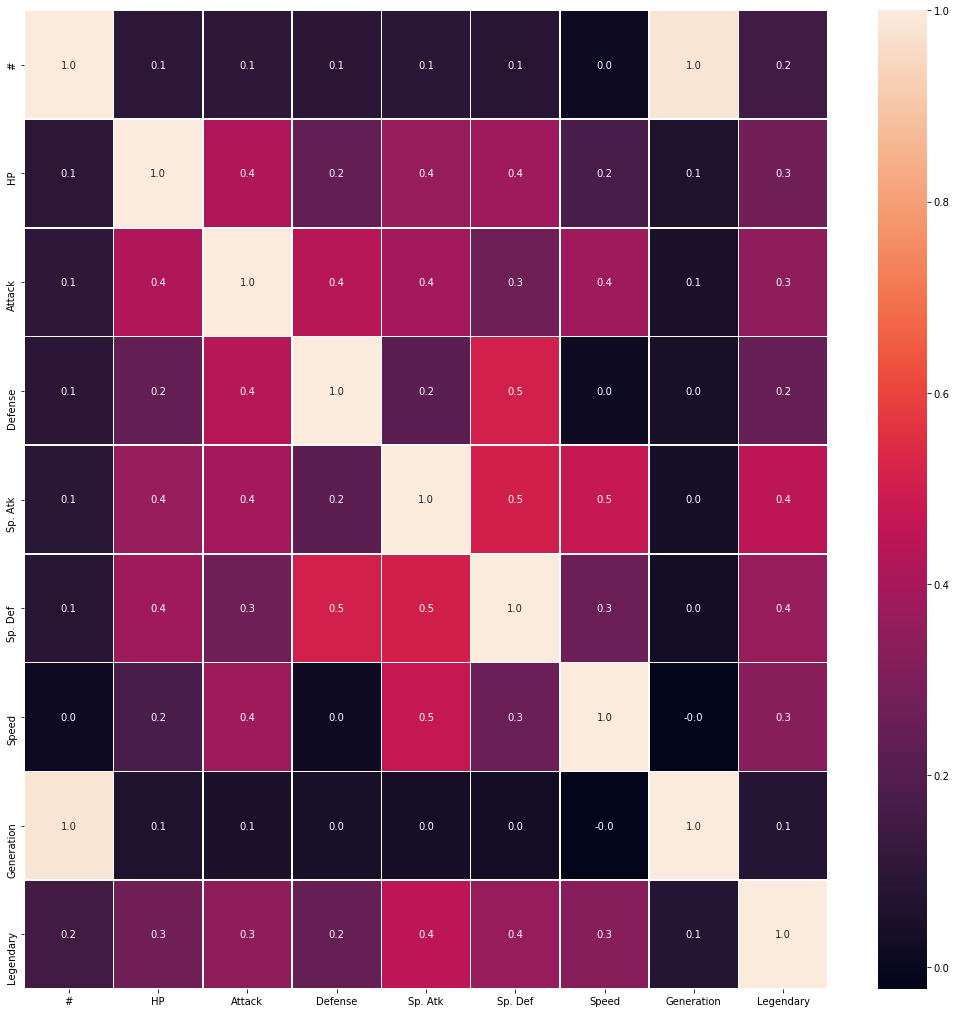

In [73]:
f, ax = plt.subplots(figsize =(18, 18))
sns.heatmap(pokemon_df.corr(), annot=True, linewidth=.5, fmt= '.1f',ax=ax)

plt.show()

In [6]:
pokemon_df.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


## As you can see, generation and lengendary columns do not have much to do with and of the other data, so we decided to not use these 2 columns with our dataset

## Removing the Generation and Lengendary columns since they are irrelavent to pokemon combat wins

In [7]:
features = ['#', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

print(pokemon_df[features])


       #    Type 1  Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0      1     Grass  Poison   45      49       49       65       65     45
1      2     Grass  Poison   60      62       63       80       80     60
2      3     Grass  Poison   80      82       83      100      100     80
3      4     Grass  Poison   80     100      123      122      120     80
4      5      Fire     NaN   39      52       43       60       50     65
5      6      Fire     NaN   58      64       58       80       65     80
6      7      Fire  Flying   78      84       78      109       85    100
7      8      Fire  Dragon   78     130      111      130       85    100
8      9      Fire  Flying   78     104       78      159      115    100
9     10     Water     NaN   44      48       65       50       64     43
10    11     Water     NaN   59      63       80       65       80     58
11    12     Water     NaN   79      83      100       85      105     78
12    13     Water     NaN   79     10

## Removing all the NaN values and replacing it with None

In [8]:
pokemon_update_df = pokemon_df.where((pd.notnull(pokemon_df)), None)
pokemon_update_df[features]

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Grass,Poison,45,49,49,65,65,45
1,2,Grass,Poison,60,62,63,80,80,60
2,3,Grass,Poison,80,82,83,100,100,80
3,4,Grass,Poison,80,100,123,122,120,80
4,5,Fire,None,39,52,43,60,50,65
5,6,Fire,None,58,64,58,80,65,80
6,7,Fire,Flying,78,84,78,109,85,100
7,8,Fire,Dragon,78,130,111,130,85,100
8,9,Fire,Flying,78,104,78,159,115,100
9,10,Water,None,44,48,65,50,64,43


In [9]:
pokemon_update_df[features].isnull().sum()

#            0
Type 1       0
Type 2     386
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
dtype: int64

## Scatter plots to show Attack & Defense as well as Special Attack & Defense

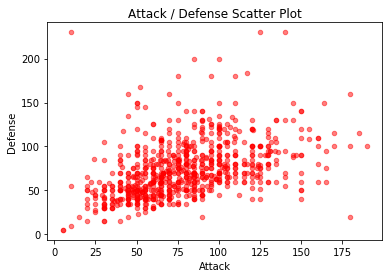

In [10]:
pokemon_update_df.plot(kind='scatter', x='Attack', y='Defense', alpha=.5, color='red')
plt.xlabel('Attack')
plt.ylabel('Defense')

plt.title('Attack / Defense Scatter Plot')

plt.show()

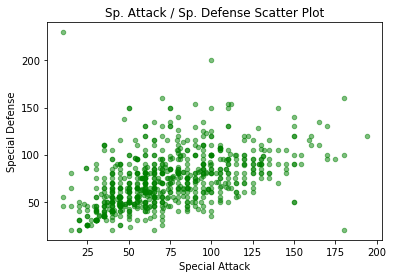

In [11]:
pokemon_update_df.plot(kind='scatter', x='Sp. Atk', y='Sp. Def', alpha=.5, color='green')
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')

plt.title('Sp. Attack / Sp. Defense Scatter Plot')

plt.show()

In [12]:
combats_df

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


## Renaming 'First_pokemon' to '#' to combine 2 dataframes

In [13]:
#result = pd.concat([pokemon_update_df, combats_df], axis=1, join_axes=['#'])
combats_df = combats_df.rename(columns={'First_pokemon': '#', 'Second_pokemon': 'Battle Pokemon'})
combats_df

,#,Battle Pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


## Testing merge with both dataframes

In [14]:
result = pd.merge(pokemon_update_df[features], combats_df, on="#", how='left')
result

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Battle Pokemon,Winner
0,1,Grass,Poison,45,49,49,65,65,45,679.0,679.0
1,1,Grass,Poison,45,49,49,65,65,45,687.0,687.0
2,1,Grass,Poison,45,49,49,65,65,45,557.0,557.0
3,1,Grass,Poison,45,49,49,65,65,45,766.0,766.0
4,1,Grass,Poison,45,49,49,65,65,45,153.0,153.0
5,1,Grass,Poison,45,49,49,65,65,45,194.0,1.0
6,1,Grass,Poison,45,49,49,65,65,45,604.0,604.0
7,1,Grass,Poison,45,49,49,65,65,45,285.0,1.0
8,1,Grass,Poison,45,49,49,65,65,45,579.0,1.0
9,1,Grass,Poison,45,49,49,65,65,45,717.0,717.0


In [15]:
result.isnull().sum()

#                     0
Type 1                0
Type 2            24039
HP                    0
Attack                0
Defense               0
Sp. Atk               0
Sp. Def               0
Speed                 0
Battle Pokemon       16
Winner               16
dtype: int64

## Lambda to show number of won or loss battles

In [16]:
won_df = lambda x: combats_df[(combats_df["#"] == x) & (combats_df["Winner"] == x)]
won_df

#matches_won_df = lambda x: combats[ ( (combats["First_pokemon"] == x) | (combats["Second_pokemon"] == x) )  & (combats["Winner"] == x) ]

<function __main__.<lambda>>

In [17]:
lost_to_df = lambda x: combats_df[(combats_df["#"] == x) & (combats_df["Winner"] != x)]
lost_to_df

#matches_lost_df = lambda x: combats[ ( (combats["First_pokemon"] == x) | (combats["Second_pokemon"] == x) )  & (combats["Winner"] != x) ]

<function __main__.<lambda>>

In [18]:
#for k in range(len(pokemon_df)):
#    print(lost_to_df(k))

In [19]:
#for k in range(len(pokemon_df)):
#    print(won_df(k))

In [146]:
from PIL import Image
im = Image.open("pokemon_montage.png")

pokemon_images = []
y = 0
x = 0
i = 0
for k in range(840):
    i = k % 40
    if (k % 40 == 0):
        y += 126.75
    x = i*126
    crop_rectangle = (x, y-126.75, x+126, y)
    cropped_im = im.crop(crop_rectangle)
    pokemon_images.append(cropped_im)



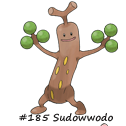

In [147]:
pokemon_images[200]

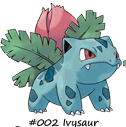

In [148]:
pokemon_images[1]

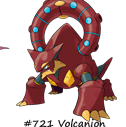

In [149]:
pokemon_images[834]

In [24]:
print(list(result))

['#', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Battle Pokemon', 'Winner']


## implement one hot encode
### it removed the NaN values from type 2

In [25]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['Type 1', 'Type 2', 'Battle Pokemon']

new_data_frame = pd.get_dummies(result, columns = cat_features)
new_data_frame

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Winner,Type 1_Bug,Type 1_Dark,...,Battle Pokemon_791.0,Battle Pokemon_792.0,Battle Pokemon_793.0,Battle Pokemon_794.0,Battle Pokemon_795.0,Battle Pokemon_796.0,Battle Pokemon_797.0,Battle Pokemon_798.0,Battle Pokemon_799.0,Battle Pokemon_800.0
0,1,45,49,49,65,65,45,679.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,45,49,49,65,65,45,687.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,45,49,49,65,65,45,557.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,45,49,49,65,65,45,766.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,45,49,49,65,65,45,153.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,45,49,49,65,65,45,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,45,49,49,65,65,45,604.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,45,49,49,65,65,45,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,45,49,49,65,65,45,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,45,49,49,65,65,45,717.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
new_data_frame.isnull().sum()

#                        0
HP                       0
Attack                   0
Defense                  0
Sp. Atk                  0
Sp. Def                  0
Speed                    0
Winner                  16
Type 1_Bug               0
Type 1_Dark              0
Type 1_Dragon            0
Type 1_Electric          0
Type 1_Fairy             0
Type 1_Fighting          0
Type 1_Fire              0
Type 1_Flying            0
Type 1_Ghost             0
Type 1_Grass             0
Type 1_Ground            0
Type 1_Ice               0
Type 1_Normal            0
Type 1_Poison            0
Type 1_Psychic           0
Type 1_Rock              0
Type 1_Steel             0
Type 1_Water             0
Type 2_Bug               0
Type 2_Dark              0
Type 2_Dragon            0
Type 2_Electric          0
                        ..
Battle Pokemon_770.0     0
Battle Pokemon_771.0     0
Battle Pokemon_772.0     0
Battle Pokemon_773.0     0
Battle Pokemon_774.0     0
Battle Pokemon_775.0     0
B

In [27]:
new_data_frame = new_data_frame.dropna()

In [28]:
new_data_frame.isnull().sum()

#                       0
HP                      0
Attack                  0
Defense                 0
Sp. Atk                 0
Sp. Def                 0
Speed                   0
Winner                  0
Type 1_Bug              0
Type 1_Dark             0
Type 1_Dragon           0
Type 1_Electric         0
Type 1_Fairy            0
Type 1_Fighting         0
Type 1_Fire             0
Type 1_Flying           0
Type 1_Ghost            0
Type 1_Grass            0
Type 1_Ground           0
Type 1_Ice              0
Type 1_Normal           0
Type 1_Poison           0
Type 1_Psychic          0
Type 1_Rock             0
Type 1_Steel            0
Type 1_Water            0
Type 2_Bug              0
Type 2_Dark             0
Type 2_Dragon           0
Type 2_Electric         0
                       ..
Battle Pokemon_770.0    0
Battle Pokemon_771.0    0
Battle Pokemon_772.0    0
Battle Pokemon_773.0    0
Battle Pokemon_774.0    0
Battle Pokemon_775.0    0
Battle Pokemon_776.0    0
Battle Pokem

In [29]:
new_data_frame.shape

(50000, 828)

In [30]:
print(list(new_data_frame.loc[:, new_data_frame.columns != 'Winner']))

#print(list(new_data_frame.columns.values))

['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water', 'Battle Pokemon_1.0', 'Battle Pokemon_2.0', 'Battle Pokemon_3.0', 'Battle Pokemon_4.0', 'Battle Pokemon_5.0', 'Battle Pokemon_6.0', 'Battle Pokemon_7.0', 'Battle Pokemon_8.0', 'Battle Pokemon_9.0', 'Battle Pokemon_10.0', 'Battle Pokemon_11.0', 'Battle Pokemon_13.0', 'Battle Pokemon_14.0', 'Battle Pokemon_15.0', 'Battle Pokemon_16.0', 'Battle Poke

In [31]:
from sklearn.model_selection import train_test_split

features = list(new_data_frame.loc[:, new_data_frame.columns != 'Winner'])
label = ["Winner"]

x = new_data_frame[features]
y = new_data_frame[label]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 3)

In [32]:
x_train.shape

(35000, 827)

In [33]:
y_train.shape

(35000, 1)

In [34]:
print(np.ravel(y_train))

[ 350.   93.  560. ...,  143.   28.  157.]


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_predict)

print (knn_accuracy)


0.406666666667


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

my_logreg = LogisticRegression()
my_logreg.fit(x_train, y_train)
y_predict_lr = my_logreg.predict(x_test)

log_accuracy = accuracy_score(y_test, y_predict_lr)

print(log_accuracy)

In [58]:
my_decisiontree = DecisionTreeClassifier()
my_decisiontree.fit(x_train, y_train)
y_predict_dt = my_decisiontree.predict(x_test)

dec_tree_accuracy = accuracy_score(y_test, y_predict_dt)
print(dec_tree_accuracy)

0.8366


In [64]:
ran_forest = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state = 2)
ran_forest.fit(x_train, y_train.values.ravel())
y_predict_rf = ran_forest.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_predict_rf)
print(rf_accuracy)

0.831666666667


from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF([1.0])

gaus = GaussianProcessClassifier(kernel = kernel)
gaus.fit(x_train, y_train.values.ravel())
y_predict_gaus = gaus.predict(x_test)

gaus_accuracy = accuracy_score(y_test, y_predict_gaus)
print(gaus_accuracy)

In [91]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train.values.ravel())
y_predict_nb = gaussian_nb.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_predict_nb)
print(nb_accuracy)

0.195066666667


In [46]:
ex_trees = ExtraTreesClassifier(random_state = 0, n_estimators = 10)
ex_trees.fit(x_train, y_train.values.ravel())
y_predict_ex_tree = ex_trees.predict(x_test)

ex_tree_accuracy = accuracy_score(y_test, y_predict_ex_tree)
print(ex_tree_accuracy)

0.833266666667


In [41]:
bag_class = BaggingClassifier()
bag_class.fit(x_train, y_train.values.ravel())
y_predict_bag = bag_class.predict(x_test)

bag_class_accuracy = accuracy_score(y_test, y_predict_bag)
print(bag_class_accuracy)

0.863266666667


In [47]:
ada_boost = AdaBoostClassifier(random_state = 0,)
ada_boost.fit(x_train, y_train.values.ravel())
y_predict_ada = ada_boost.predict(x_test)

ada_boost_accuracy = accuracy_score(y_test, y_predict_ada)
print(1 - ada_boost_accuracy)

0.986666666667


# __`combats_df`__

In [18]:
combats_df.head()

,#,Battle Pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


#### Print shape of combats_df

In [19]:
combats_df.shape

(50000, 3)

# __`tests_df`__

In [20]:
tests_df.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


#### Print shape of tests_df

In [21]:
tests_df.shape

(10000, 2)